## Data structure
It contains the following variables

    Product - the model no. of the treadmill
    Age - in no of years, of the customer
    Gender - of the customer
    Education - in no. of years, of the customer
    Marital Status - of the customer
    Usage - Avg. # times the customer wants to use the treadmill every week
    Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
    Income - of the customer
    Miles- expected to run

# **Import Libraries**

In [2]:
import warnings
warnings.filterwarnings('ignore') #to avoid warnings

In [3]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# **Load dataset**

In [11]:
dataset = "https://raw.githubusercontent.com/arifadli/Exploratory-Data-Analysis/main/Other/CardioGoodFitness.csv"
df = pd.read_csv(dataset)
df.head(15)

mydata=df

In [12]:
# create a copy of this data to avoid changes in the original data
fit = mydata.copy()

In [13]:
# view first 5 rows of the data - "fit"
fit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


# ***Observations***


In [14]:
fit.shape

(180, 9)

* The dataset has 180 rows and 9 columns.

In [15]:
fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* There are no null values in this dataset

In [ ]:
fit.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180,NaN,NaN,NaN,28.7889,6.9435,18,24,26,33,50
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180,NaN,NaN,NaN,15.5722,1.61705,12,14,16,16,21
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180,NaN,NaN,NaN,3.45556,1.0848,2,3,3,4,7
Fitness,180,NaN,NaN,NaN,3.31111,0.958869,1,3,3,4,5
Income,180,NaN,NaN,NaN,53719.6,16506.7,29562,44058.8,50596.5,58668,104581
Miles,180,NaN,NaN,NaN,103.194,51.8636,21,66,94,114.75,360


* Product variable has 3, Gender has 2 and MaritalStatus has 2 unique categories.
* The most bought product is TM195.
* There are more number of Male customers than females.
* There are more married customers than single ones.
* 75% of customers are below 33 years of age


# **Univariate analysis**

In [16]:
def hist_box(mycol):
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw = {"height_ratios": (.25, .75)})

    sns.boxplot(mycol, ax=ax_box, showmeans=True, color='red')
    sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')
    ax_hist.axvline(np.mean(mycol), color='g', linestyle='--') # Add mean to the histogram
    ax_hist.axvline(np.median(mycol), color='black', linestyle='-') # Add median to the histogram

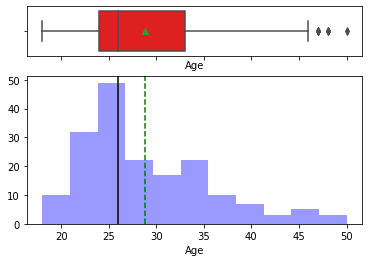

In [ ]:
hist_box(fit.Age)

* Majority of customers are aged between 21 to 35.
* There are very less outliers.

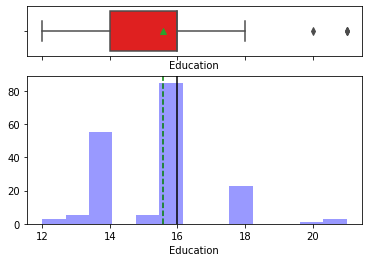

In [ ]:
hist_box(fit.Education)

* CUstomers have an average of 15 years of education.

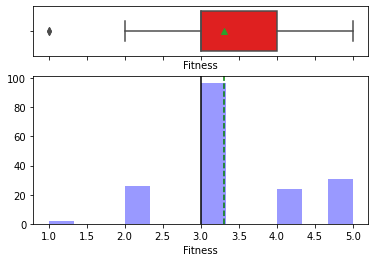

In [ ]:
hist_box(fit.Fitness)

Around 60% of consumers have an average self-rating of 3.3. This suggests that customers are reasonably fit.


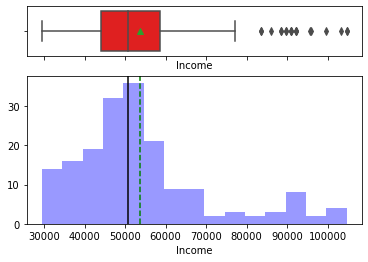

In [ ]:
hist_box(fit.Income)

The mean is pretty near to the median, showing that 50% of consumers earn almost the same as the average income - $53,000.

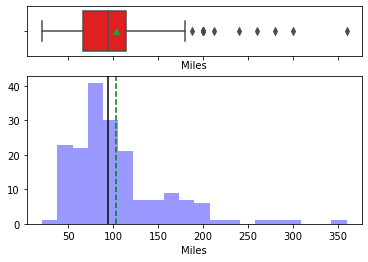

In [ ]:
hist_box(fit.Miles)

50% of cusotmers expect to run approximately 94 miles.

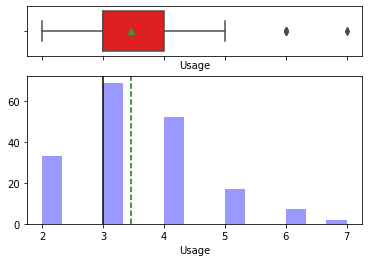

In [ ]:
hist_box(fit.Usage)

50% of customers plan to use the treadmill 3-4 times a week.

# **Categorical variables**

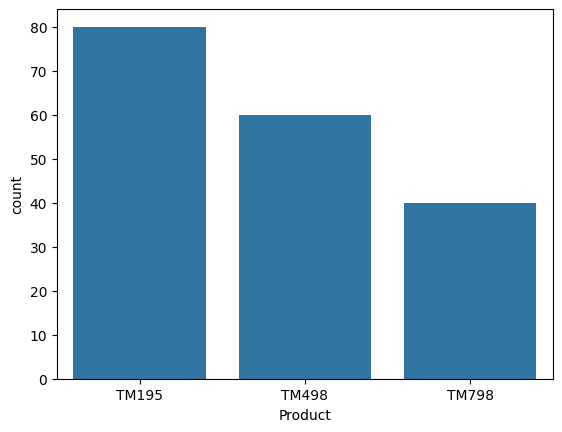

In [18]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='Product', data=fit)
plt.show()

TM195 has been purchased by around 80 consumers, representing approximately 44% of the total, making it the most desired product.


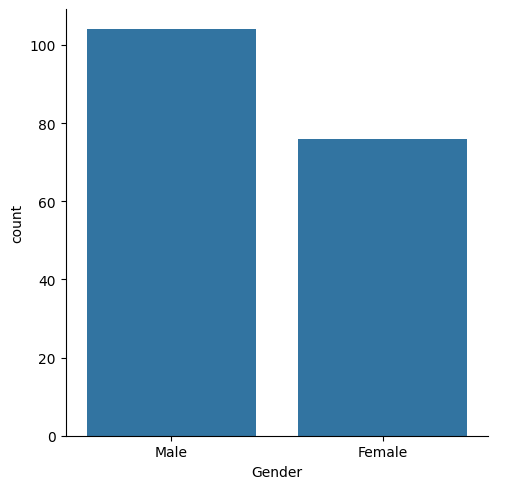

In [22]:
# Gender distribution
sns.catplot(x='Gender', data=fit, kind='count')
plt.show()

THere are more Male customers than females.

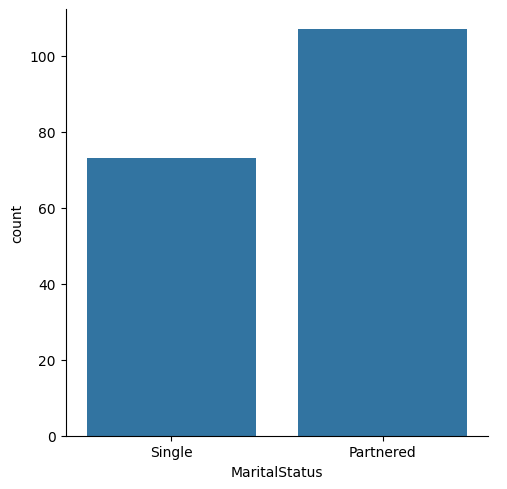

In [23]:
# Marital status distribution
sns.catplot(x='MaritalStatus', data=fit, kind='count')
plt.show()

There are more married customers than single ones.

# **Multi-variate Analysis**

In [24]:
# slice out the numerical variabales from dataset to check the correlation between the numericals.

fit_num = fit.select_dtypes(include='int64')
fit_num.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


In [25]:
corr = fit_num.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


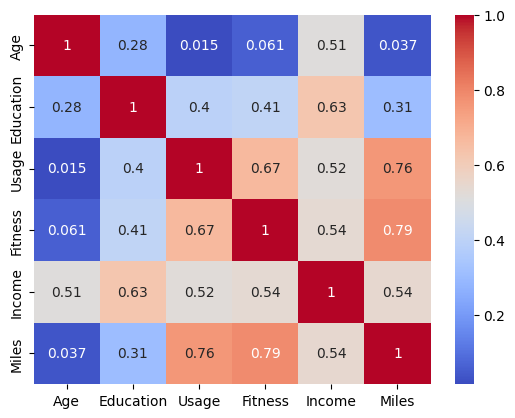

In [26]:
# plot the heatmap to analyse the correlation between all the numerical variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

* Income has a good correlation with Education.
* Income is also correlated with all the other variables.

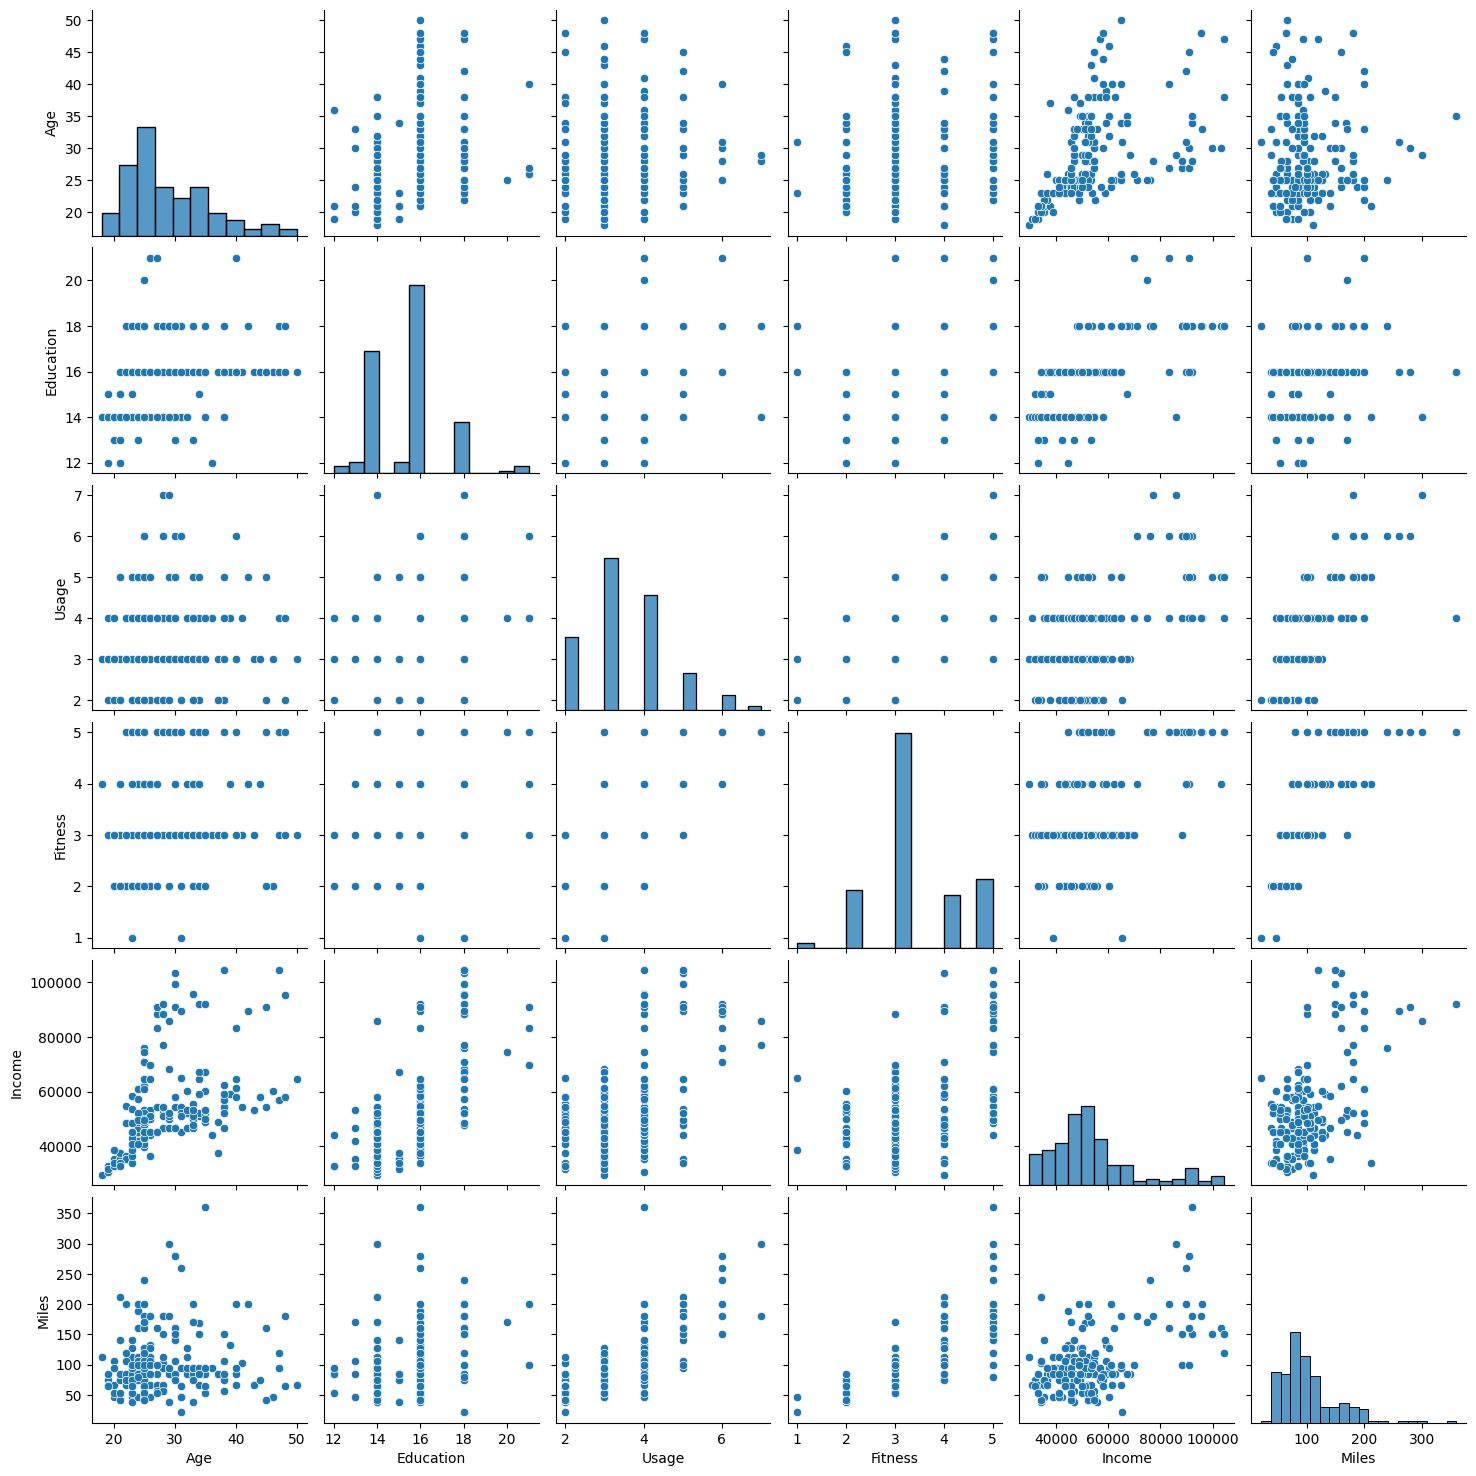

In [27]:
# Looking at relations between the numerical variables
sns.pairplot(fit)

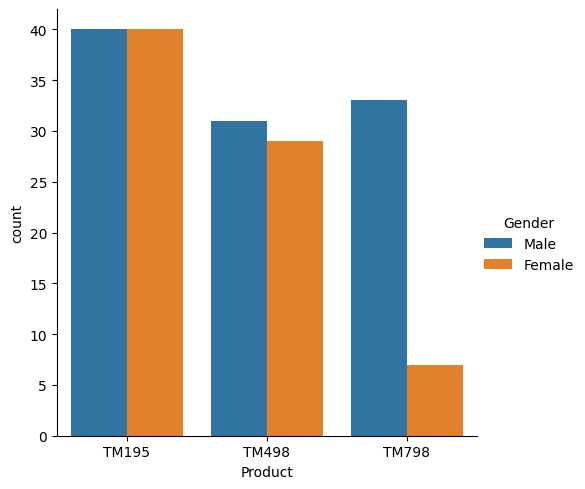

In [28]:
# Analyze how Gender affects product preference
sns.catplot(x='Product', data=fit, hue='Gender', kind='count')
plt.show()

* TM195 is the most preferable choice for both Male & Female customers.
* TM798 is mostly bought by Male customers.

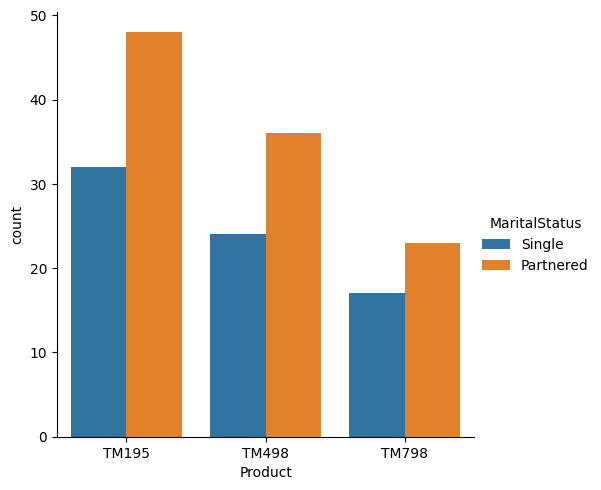

In [29]:
# Analyze how MaritalStatus affects product preference
sns.catplot(x='Product', data=fit, hue='MaritalStatus', kind='count')
plt.show()

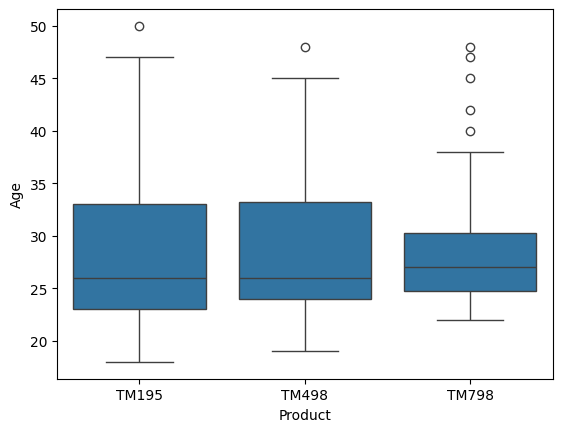

In [30]:
# Analyze the age distribution for each product.
sns.boxplot(x='Product', y='Age', data=fit)
plt.show()

* TM798 has a comparatively smaller age range (23-37 years of age) with some outliers (40-47yrs).
* TM195 & TM498 have a similar age range of customers.

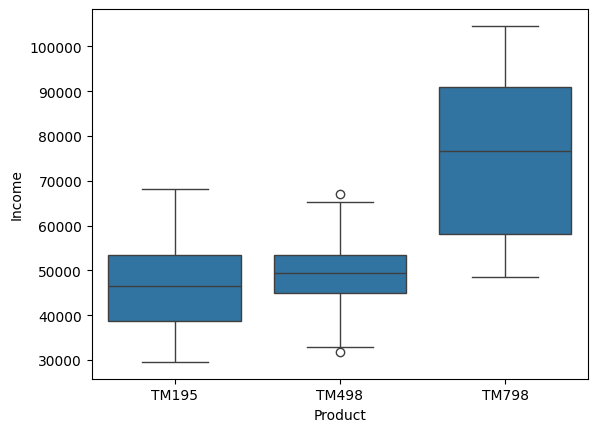

In [31]:
# Analyse the affect of income range on product preference.
sns.boxplot(x='Product', y='Income', data=fit)
plt.show()

Customers with high-income range prefer TM798. Customers with low-income prefer either TM195 or TM498.

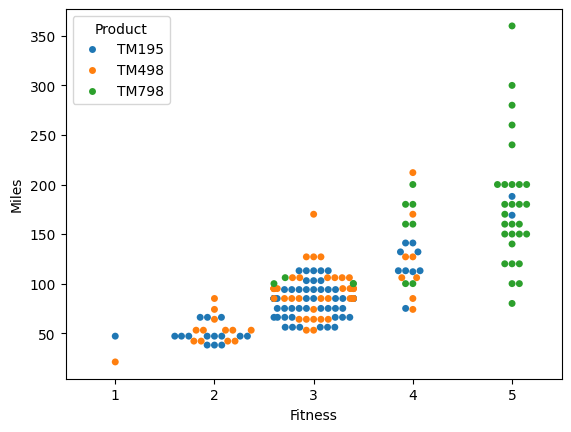

In [32]:
# Analyse how fitness rating & no:of miles they target to run are affecting their product preference.
sns.swarmplot(x='Fitness', y='Miles', data=fit, hue='Product')
plt.show()

* Customers with higher fitness level expect to run more miles and mostly prefer TM798.
* Customers around avegrage fitness rating prefer TM195 & TM498

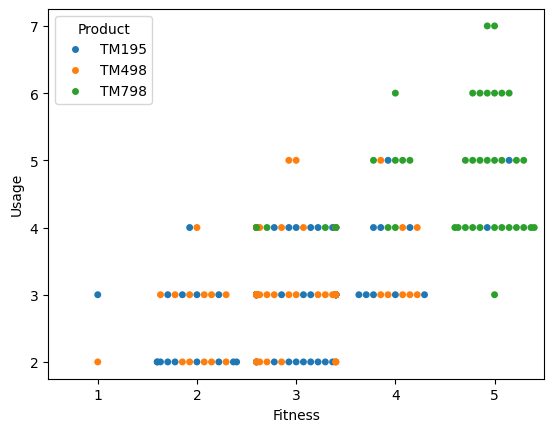

In [33]:
# Analyse how education & income affect product prefernce of customers.
sns.swarmplot(x='Fitness', y='Usage', data=fit, hue="Product")
plt.show()

* TM798 is preferred by customers who have high fitness ratings and high usage.
* TM195 & TM498 users plan to use 2-3 times.

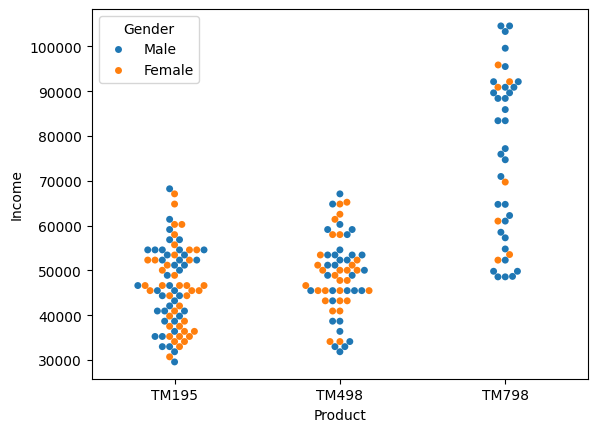

In [34]:
# Analyse income as per the gender and how they affect product preference.
sns.swarmplot(x='Product', y='Income', data=fit, hue='Gender')
plt.show()

Male cusotmers have comparatively higher income than Females and so are more likely to buy TM798

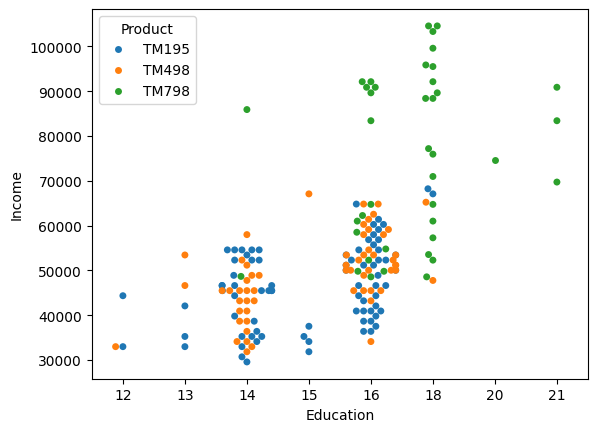

In [35]:
sns.swarmplot(x='Education', y="Income", data=fit, hue='Product')
plt.show()

High income with education 18 buy to product TM798